## What is the problem, what is the main question we want to answer?

### The question is: "What should my daughter study in college or university to ensure she gets a job?"/ "how major fields of study impact labour force outcomes for Canadians?"

This question has several dimensions we need to zoom out! Let's break it down.

1- Major fields of study.

2- Labour force outcome.

3- Canadians.

Those are the main key factors we will try to figure out what kind of connection/ correlation between them. Nevertheless, there should be some other related characteristics that can add some information to answer our question such as the gender, age, and the geographic area.

To answer this question, we need to build a knowledge base as a result of analyzing some historical data or past experiences. 

We can divide our data into two main parts: 

1- Target variable(s) is the dependent variable that we are looking to evaluate or predict. We have the "labour force outcome" as a target variable.

2- Features or predictors  are the independent variables that can impact the target variable, for example gender, age, highest degree, and geographic area.

What metrics we can use to evaluate the labour force outcome?

Labour Force Outcome represents the already-employed people and the people who are looking for a job, excluding those people who are jobless and not willing to get a job or not actively looking for a job (e.g., housewives, retirees, etc). So several metrics can be used to study the labour force outcome, for example: employment rate, unemployment rate, salaries and wages. 

#### What data that can answer our question?

After sometime of searching for a good data (up to date, large enough to solve the problem, and covers the main features of our interest), I decided to go with a data set offered by Statistics Canada.

https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Rp-eng.cfm?TABID=4&LANG=E&A=R&APATH=3&DETAIL=0&DIM=0&FL=A&FREE=0&GC=01&GL=-1&GID=1354588&GK=1&GRP=1&O=D&PID=111847&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2017&THEME=124&VID=0&VNAMEE=&VNAMEF=&D1=0&D2=0&D3=0&D4=0&D5=0&D6=0

Let's dive in!

In [2]:
## Importing the required libraries
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

##Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import dexplot as dxp


## Reading Data

In [42]:
Data_dir = Path('C:/Users/KBrig/Labour-Force-Outcome-Data-Analysis/Labour_data.csv')
Data_dir

WindowsPath('C:/Users/KBrig/Labour-Force-Outcome-Data-Analysis/Labour_data.csv')

In [43]:
Total= pd.read_csv(Data_dir)

How does our data look like?

In [46]:
Total.shape

(3920697, 27)

In [44]:
Total.head(3)

,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,DATA_QUALITY_FLAG,ALT_GEO_CODE,"DIM: Highest certificate, diploma or degree (11)","Member ID: Highest certificate, diploma or degree (11)","Notes: Highest certificate, diploma or degree (11)",...,Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7),Dim: Labour force status (8): Member ID: [2]: In the labour force,Dim: Labour force status (8): Member ID: [3]: Employed,Dim: Labour force status (8): Member ID: [4]: Unemployed,Dim: Labour force status (8): Member ID: [5]: Not in the labour force,Dim: Labour force status (8): Member ID: [6]: Participation rate,Dim: Labour force status (8): Member ID: [7]: Employment rate,Dim: Labour force status (8): Member ID: [8]: Unemployment rate
0,2016,1,0,Canada,5.1,20000,1,"Total - Highest certificate, diploma or degree",1,1.0,...,1,6.0,28643015,18672470,17230035,1442430,9970545,65.2,60.2,7.7
1,2016,1,0,Canada,5.1,20000,1,"Total - Highest certificate, diploma or degree",1,1.0,...,2,NaN,12815975,6825825,6098850,726975,5990155,53.3,47.6,10.7
2,2016,1,0,Canada,5.1,20000,1,"Total - Highest certificate, diploma or degree",1,1.0,...,3,NaN,205930,161910,154270,7635,44020,78.6,74.9,4.7


## Data Cleaning

## What features/variables do we have here?

In [47]:
Total.columns

Index(['CENSUS_YEAR', 'GEO_CODE (POR)', 'GEO_LEVEL', 'GEO_NAME', 'GNR',
       'DATA_QUALITY_FLAG', 'ALT_GEO_CODE',
       'DIM: Highest certificate, diploma or degree (11)',
       'Member ID: Highest certificate, diploma or degree (11)',
       'Notes: Highest certificate, diploma or degree (11)', 'DIM: Age (9)',
       'Member ID: Age (9)', 'Notes: Age (9)', 'DIM: Sex (3)',
       'Member ID: Sex (3)', 'Notes: Sex (3)',
       'DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)',
       'Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)',
       'Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)',
       'Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)',
       'Dim: Labour force status (8): Member ID: [2]: In the labour force',
       'Dim: Labour force status (8): Member ID: [3]: Employed',
       'Dim: Labour force status (8): Member 

In [48]:
Total.GEO_NAME.unique()

array(['Canada', 'Newfoundland and Labrador', 'Division No. 1',
       'Division No. 2', 'Division No. 3', 'Division No. 4',
       'Division No. 5', 'Division No. 6', 'Division No. 7',
       'Division No. 8', 'Division No. 9', 'Division No. 10',
       'Division No. 11', 'Prince Edward Island', 'Kings', 'Queens',
       'Prince', 'Nova Scotia', 'Shelburne', 'Yarmouth', 'Digby',
       'Annapolis', 'Lunenburg', 'Hants', 'Halifax', 'Colchester',
       'Cumberland', 'Pictou', 'Guysborough', 'Antigonish', 'Inverness',
       'Richmond', 'Cape Breton', 'Victoria', 'New Brunswick',
       'Saint John', 'Charlotte', 'Sunbury', 'Albert', 'Westmorland',
       'Kent', 'Northumberland', 'York', 'Carleton', 'Madawaska',
       'Restigouche', 'Gloucester', 'Quebec', 'Les Îles-de-la-Madeleine',
       'Le Rocher-Percé', 'La Côte-de-Gaspé', 'La Haute-Gaspésie',
       'Bonaventure', 'Avignon', 'La Matapédia', 'Matane', 'La Mitis',
       'Rimouski-Neigette', 'Les Basques', 'Rivière-du-Loup',
    

In [54]:
Provinces= ['Alberta' ,'British Columbia','Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan']

In [56]:
Total[Total['GEO_NAME'].isin(Provinces)].head()

,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,DATA_QUALITY_FLAG,ALT_GEO_CODE,"DIM: Highest certificate, diploma or degree (11)","Member ID: Highest certificate, diploma or degree (11)","Notes: Highest certificate, diploma or degree (11)",...,Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7),Dim: Labour force status (8): Member ID: [2]: In the labour force,Dim: Labour force status (8): Member ID: [3]: Employed,Dim: Labour force status (8): Member ID: [4]: Unemployed,Dim: Labour force status (8): Member ID: [5]: Not in the labour force,Dim: Labour force status (8): Member ID: [6]: Participation rate,Dim: Labour force status (8): Member ID: [7]: Employment rate,Dim: Labour force status (8): Member ID: [8]: Unemployment rate
12771,2016,10,1,Newfoundland and Labrador,6.8,0,10,"Total - Highest certificate, diploma or degree",1,1.0,...,1,6.0,437930,256855,216705,40150,181080,58.7,49.5,15.6
12772,2016,10,1,Newfoundland and Labrador,6.8,0,10,"Total - Highest certificate, diploma or degree",1,1.0,...,2,NaN,212145,94555,73465,21090,117590,44.6,34.6,22.3
12773,2016,10,1,Newfoundland and Labrador,6.8,0,10,"Total - Highest certificate, diploma or degree",1,1.0,...,3,NaN,1170,865,720,140,310,73.9,61.5,16.2
12774,2016,10,1,Newfoundland and Labrador,6.8,0,10,"Total - Highest certificate, diploma or degree",1,1.0,...,4,NaN,2460,1910,1550,360,550,77.6,63.0,18.8
12775,2016,10,1,Newfoundland and Labrador,6.8,0,10,"Total - Highest certificate, diploma or degree",1,1.0,...,5,NaN,275,240,225,10,35,87.3,81.8,4.2


I can see that we have various hierarchies of the geographic areas, so it is more logical to compare data of the same category (e.g., Canada only,provinces only, devisions only, regions only,etc). I would start analyzing data of Canada's provinces. Nevertheless, we can later have another part analyzing data of other geographical hierarchies.

In [57]:
Canada_data = Total[Total['GEO_NAME'].isin(Provinces)]

In [58]:
Canada_data.shape

(127710, 27)

We have a total of 127710 samples characterized by 27 features.

## Missing Data

In [59]:
Canada_data.isnull().sum()

CENSUS_YEAR                                                                                        0
GEO_CODE (POR)                                                                                     0
GEO_LEVEL                                                                                          0
GEO_NAME                                                                                           0
GNR                                                                                                0
DATA_QUALITY_FLAG                                                                                  0
ALT_GEO_CODE                                                                                       0
DIM: Highest certificate, diploma or degree (11)                                                   0
Member ID: Highest certificate, diploma or degree (11)                                             0
Notes: Highest certificate, diploma or degree (11)                                         

Thus, we don't really have missing data. Instead, those missing entires are within the notes section of the data. No harm then!

## Census Year

In [60]:
Canada_data.CENSUS_YEAR.unique()

array([2016], dtype=int64)

All the data we have are collected in the same year, 2016. 

## Geographical Features

In [61]:
Geo_features = ['GEO_CODE (POR)', 'GEO_LEVEL','ALT_GEO_CODE','GEO_NAME']

In [62]:
for col in Geo_features:
    print(Canada_data[col].unique())

[10 11 12 13 24 35 46 47 48 59]
[1]
[10 11 12 13 24 35 46 47 48 59]
['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia']


The three variables represents the geographic area. 

## GNR

In [63]:
Canada_data.GNR.unique()

array([6.8, 5.6, 5.5, 4.9, 4.3, 4.6, 5.3, 6.3, 6.1])

## Data Quality Flag

In [64]:
Canada_data.DATA_QUALITY_FLAG.unique()

array([    0, 20000, 20001], dtype=int64)

## Highest certificate, diploma or degree

In [65]:
EducationalLevels_features = ['DIM: Highest certificate, diploma or degree (11)','Member ID: Highest certificate, diploma or degree (11)','Notes: Highest certificate, diploma or degree (11)']

In [66]:
for col in EducationalLevels_features:
    print(Canada_data[col].unique())

['Total - Highest certificate, diploma or degree'
 'No certificate, diploma or degree'
 'Secondary (high) school diploma or equivalency certificate'
 'Apprenticeship or trades certificate or diploma'
 'Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification'
 'Certificate of Apprenticeship or Certificate of Qualification'
 'College, CEGEP or other non-university certificate or diploma'
 'University certificate or diploma below bachelor level'
 'University certificate, diploma or degree at bachelor level or above'
 "Bachelor's degree"
 'University certificate, diploma or degree above bachelor level']
[ 1  2  3  4  5  6  7  8  9 10 11]
[ 1. nan  2.  3.  4.  5.]


We are interested in only those graduates from a collage or university!

- College, CEGEP or other non-university certificate or diploma.

- University certificate or diploma below bachelor level.

- University certificate, diploma or degree at bachelor level or above.

- Bachelor's degree.

- University certificate, diploma or degree above bachelor level.


In [67]:
Degrees_of_interest = [7,8,9,10,11]

In [68]:
## select only rows with the passed educational lavels 
Canada_data[Canada_data['Member ID: Highest certificate, diploma or degree (11)'].isin(Degrees_of_interest)].head(3)

,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,DATA_QUALITY_FLAG,ALT_GEO_CODE,"DIM: Highest certificate, diploma or degree (11)","Member ID: Highest certificate, diploma or degree (11)","Notes: Highest certificate, diploma or degree (11)",...,Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7),Dim: Labour force status (8): Member ID: [2]: In the labour force,Dim: Labour force status (8): Member ID: [3]: Employed,Dim: Labour force status (8): Member ID: [4]: Unemployed,Dim: Labour force status (8): Member ID: [5]: Not in the labour force,Dim: Labour force status (8): Member ID: [6]: Participation rate,Dim: Labour force status (8): Member ID: [7]: Employment rate,Dim: Labour force status (8): Member ID: [8]: Unemployment rate
19737,2016,10,1,Newfoundland and Labrador,6.8,0,10,"College, CEGEP or other non-university certifi...",7,NaN,...,1,6.0,101250,73295,64310,8980,27955,72.4,63.5,12.3
19738,2016,10,1,Newfoundland and Labrador,6.8,0,10,"College, CEGEP or other non-university certifi...",7,NaN,...,2,NaN,0,0,0,0,0,0.0,0.0,0.0
19739,2016,10,1,Newfoundland and Labrador,6.8,0,10,"College, CEGEP or other non-university certifi...",7,NaN,...,3,NaN,535,395,315,80,140,73.8,58.9,20.3


## Age

'Age' refers to the age of a person (or subject) of interest at last birthday (or relative to a specified, well-defined reference date).

In [69]:
Age_features =['DIM: Age (9)','Member ID: Age (9)','Notes: Age (9)']

In [70]:
for col in Age_features:
    print(Canada_data[col].unique())

['Total - Age' '15 to 24 years' '25 to 64 years' '25 to 54 years'
 '25 to 34 years' '35 to 44 years' '45 to 54 years' '55 to 64 years'
 '65 years and over']
[1 2 3 4 5 6 7 8 9]
[nan]


We can filter the age groups to the only ones that may add a value to our analysis.

In [71]:
Canada_data['Member ID: Age (9)'].unique()[1:]

array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [72]:
SelectedAgeGroups= [2, 3, 4, 5, 6, 7, 8, 9]

That is only what we need from the available groups of ages.

## Sex

In [73]:
Sex_features = ['DIM: Sex (3)','Member ID: Sex (3)', 'Notes: Sex (3)']

In [74]:
for col in Sex_features:
    print(Canada_data[col].unique())

['Total - Sex' 'Male' 'Female']
[1 2 3]
[nan]


In [75]:
Canada_data[(Canada_data['Member ID: Sex (3)']==2) | (Canada_data['Member ID: Sex (3)']==3)].head(3)


,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,DATA_QUALITY_FLAG,ALT_GEO_CODE,"DIM: Highest certificate, diploma or degree (11)","Member ID: Highest certificate, diploma or degree (11)","Notes: Highest certificate, diploma or degree (11)",...,Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7),Dim: Labour force status (8): Member ID: [2]: In the labour force,Dim: Labour force status (8): Member ID: [3]: Employed,Dim: Labour force status (8): Member ID: [4]: Unemployed,Dim: Labour force status (8): Member ID: [5]: Not in the labour force,Dim: Labour force status (8): Member ID: [6]: Participation rate,Dim: Labour force status (8): Member ID: [7]: Employment rate,Dim: Labour force status (8): Member ID: [8]: Unemployment rate
12814,2016,10,1,Newfoundland and Labrador,6.8,0,10,"Total - Highest certificate, diploma or degree",1,1.0,...,1,6.0,212780,133110,108395,24710,79675,62.6,50.9,18.6
12815,2016,10,1,Newfoundland and Labrador,6.8,0,10,"Total - Highest certificate, diploma or degree",1,1.0,...,2,NaN,101375,50955,38135,12820,50420,50.3,37.6,25.2
12816,2016,10,1,Newfoundland and Labrador,6.8,0,10,"Total - Highest certificate, diploma or degree",1,1.0,...,3,NaN,615,435,365,70,185,70.7,59.3,16.1


## Major Field of Study

In [76]:
StudyField_features = ['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)']

In [77]:
for col in StudyField_features:
    print(Canada_data[col].unique())

['Total - Major field of study - Classification of Instructional Programs (CIP) 2016'
 'No postsecondary certificate, diploma or degree'
 '01. Agriculture, agriculture operations and related sciences'
 '03. Natural resources and conservation'
 '04. Architecture and related services'
 '05. Area, ethnic, cultural, gender, and group studies'
 '09. Communication, journalism and related programs'
 '10. Communications technologies/technicians and support services'
 '11. Computer and information sciences and support services'
 '12. Personal and culinary services' '13. Education' '14. Engineering'
 '15. Engineering technologies and engineering-related fields'
 '16. Aboriginal and foreign languages, literatures and linguistics'
 '19. Family and consumer sciences/human sciences'
 '22. Legal professions and studies'
 '23. English language and literature/letters'
 '24. Liberal arts and sciences, general studies and humanities'
 '25. Library science' '26. Biological and biomedical sciences'
 '27. M

## Labour Force Outcome

In [78]:
LabourFeatures = ['Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)','Dim: Labour force status (8): Member ID: [2]: In the labour force','Dim: Labour force status (8): Member ID: [3]: Employed','Dim: Labour force status (8): Member ID: [4]: Unemployed','Dim: Labour force status (8): Member ID: [5]: Not in the labour force','Dim: Labour force status (8): Member ID: [6]: Participation rate','Dim: Labour force status (8): Member ID: [7]: Employment rate','Dim: Labour force status (8): Member ID: [8]: Unemployment rate']

In [79]:
for col in LabourFeatures:
    print(col, Canada_data[col].unique()[:5])

Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7) [437930 212145   1170   2460    275]
Dim: Labour force status (8): Member ID: [2]: In the labour force [256855  94555    865   1910    240]
Dim: Labour force status (8): Member ID: [3]: Employed [216705  73465    720   1550    225]
Dim: Labour force status (8): Member ID: [4]: Unemployed [40150 21090   140   360    10]
Dim: Labour force status (8): Member ID: [5]: Not in the labour force [181080 117590    310    550     35]
Dim: Labour force status (8): Member ID: [6]: Participation rate [58.7 44.6 73.9 77.6 87.3]
Dim: Labour force status (8): Member ID: [7]: Employment rate [49.5 34.6 61.5 63.  81.8]
Dim: Labour force status (8): Member ID: [8]: Unemployment rate [15.6 22.3 16.2 18.8  4.2]


### Going back to our main question we would answer: how major fields of study impact labour force outcomes for Canadians?

As we can see from the previous analysis, we have groups of features that every group represents one variable or feature. Thus, we can reduce the features to only the unique ones we need for our analysis. 

Also, for some categorical data, we are interested in only some categories (e.g., the educational level). 

1- Select only the educational levels of interest.

In [80]:
Canada_data_final = Canada_data[Canada_data['Member ID: Highest certificate, diploma or degree (11)'].isin(Degrees_of_interest)]

In [81]:
Canada_data_final['DIM: Highest certificate, diploma or degree (11)'].head()

19737    College, CEGEP or other non-university certifi...
19738    College, CEGEP or other non-university certifi...
19739    College, CEGEP or other non-university certifi...
19740    College, CEGEP or other non-university certifi...
19741    College, CEGEP or other non-university certifi...
Name: DIM: Highest certificate, diploma or degree (11), dtype: object

2- Filter only the required fields of study.

In [82]:
SelectedStudyFields_features= [3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,40, 41,42,43]

In [83]:
Canada_data_final = Canada_data_final[Canada_data_final['Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)'].isin(SelectedStudyFields_features)]

3- Filter the age groups. 

In [84]:
Canada_data_final = Canada_data_final[Canada_data_final['Member ID: Age (9)'].isin(SelectedAgeGroups)]



4- Filter sex with only Male or Female.

In [85]:
Canada_data_final = Canada_data_final[(Canada_data_final['Member ID: Sex (3)']==2) | (Canada_data_final['Member ID: Sex (3)']==3)]

In [86]:
Canada_data_final['Member ID: Sex (3)'].unique()

array([2, 3], dtype=int64)

## Labour Force Outcome

Labour Force Outcome is an elastic term that can be represented by several metrics. For our particular data, we have few variables that reflect(directly or implicitly) the status of the labour force outcome as following:

1- In the labour force

2- Not in the labour force 

3- Employment rate  

4- Unemployment rate

3- Employed

4- Unemployed                                          
                           
5- Participation rate                                  


In [87]:
LaborData = Canada_data_final[LabourFeatures]
LaborData.describe()

,Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7),Dim: Labour force status (8): Member ID: [2]: In the labour force,Dim: Labour force status (8): Member ID: [3]: Employed,Dim: Labour force status (8): Member ID: [4]: Unemployed,Dim: Labour force status (8): Member ID: [5]: Not in the labour force,Dim: Labour force status (8): Member ID: [6]: Participation rate,Dim: Labour force status (8): Member ID: [7]: Employment rate,Dim: Labour force status (8): Member ID: [8]: Unemployment rate
count,32800.000000,32800.000000,32800.000000,32800.000000,32800.000000,32800.000000,32800.000000,32800.000000
mean,1453.659756,1209.312348,1145.933079,63.388110,244.361280,51.943427,48.501226,4.471921
std,7274.563314,6328.142763,6025.386798,316.084191,1289.490106,41.130544,38.849932,9.074755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,50.000000,45.000000,0.000000,10.000000,73.400000,66.700000,0.000000
75%,510.000000,385.000000,355.000000,25.000000,85.000000,88.900000,83.300000,6.000000
max,296425.000000,242010.000000,229160.000000,12855.000000,59685.000000,100.000000,100.000000,100.000000


### How strong these labour features are correlated with each other?

In [88]:
LaborForce_corr= LaborData[['Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)','Dim: Labour force status (8): Member ID: [2]: In the labour force','Dim: Labour force status (8): Member ID: [3]: Employed','Dim: Labour force status (8): Member ID: [4]: Unemployed','Dim: Labour force status (8): Member ID: [5]: Not in the labour force']].corr()

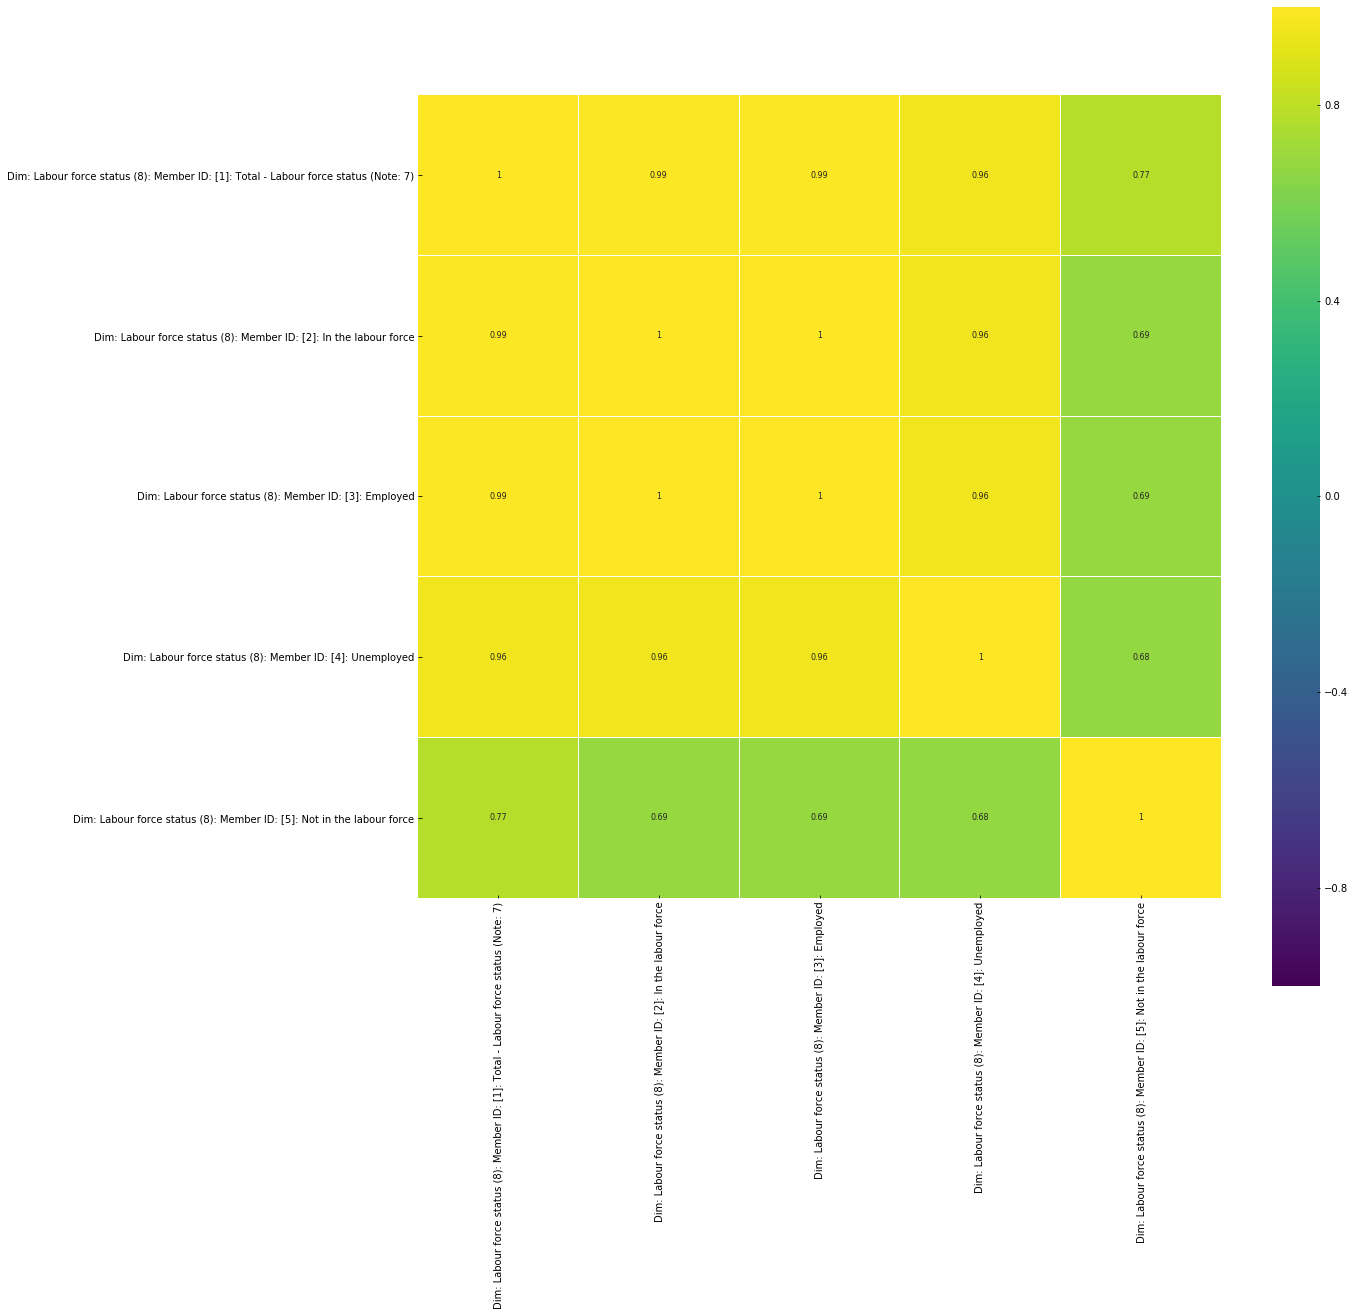

In [89]:
plt.figure(figsize=(18, 18))
sns.heatmap(LaborForce_corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

### Which labour-related features that impact the total labour force status the most " stronger correlation values"?

In [90]:
LaborForce_corr['Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)'][abs(LaborForce_corr['Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)']) > 0.5]

Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)    1.000000
Dim: Labour force status (8): Member ID: [2]: In the labour force                      0.991668
Dim: Labour force status (8): Member ID: [3]: Employed                                 0.991397
Dim: Labour force status (8): Member ID: [4]: Unemployed                               0.955007
Dim: Labour force status (8): Member ID: [5]: Not in the labour force                  0.774826
Name: Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7), dtype: float64

Thus, the labour force status is highly correlated to those features that represent the individuals who are employed, unemployed, or actively looking for a job. 

### Let's check the distribution of the employment rate for Canadian graduates at the given year without considering any other factors.

Average: 48.501226


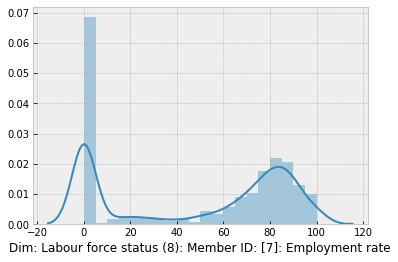

In [91]:
from scipy import stats
sns.distplot(Canada_data_final['Dim: Labour force status (8): Member ID: [7]: Employment rate']);

print("Average: %f" % Canada_data_final['Dim: Labour force status (8): Member ID: [7]: Employment rate'].mean())

As we can see in the plot, we have two prominent peaks of our population characterized with some rates of employment (~80%) and unemployment (0%). In addition, we have overall average employment rate of 48.5% as a general estimation without considering any disparities of our features' values (e.g., field of study, gender, location, etc).

### First, does having a degree (after finishing the high school) affect the labour force outcome?

In [92]:
DF3 = Canada_data_final[['Dim: Labour force status (8): Member ID: [7]: Employment rate','DIM: Highest certificate, diploma or degree (11)','DIM: Sex (3)']]


In [93]:
DF3.columns=['Employment rate','Highest degree','Sex']

In [94]:
Employment_Sex_Degree = pd.pivot_table(DF3,index=['Highest degree'],values= 'Employment rate',columns= 'Sex', aggfunc=np.mean)

#### The following table shows the average employment rate for males/females according to their highest degree.

In [95]:
Employment_Sex_Degree

Sex,Female,Male
Highest degree,,
Bachelor's degree,48.610976,52.470000
"College, CEGEP or other non-university certificate or diploma",50.806128,53.959390
University certificate or diploma below bachelor level,34.941280,37.971616
"University certificate, diploma or degree above bachelor level",46.176463,49.024756
"University certificate, diploma or degree at bachelor level or above",53.254329,57.797317


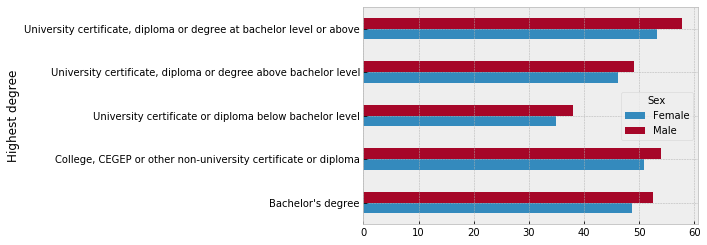

In [96]:
Employment_Sex_Degree.plot(kind='barh')

### Is there particular fields of study that contribute much stronger in the employment patterns than other fields?

In [97]:
DF1 = Canada_data_final[['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','Dim: Labour force status (8): Member ID: [7]: Employment rate']]
DF1.columns=['Field of Study', 'Average Employment Rate']

In [98]:
AvgEmplymentRate_field = pd.pivot_table(DF1, values= 'Average Employment Rate', index=['Field of Study'], aggfunc=np.mean)

In [99]:
AvgEmplymentRate_field.sort_values('Average Employment Rate')

,Average Employment Rate
Field of Study,
29. Military technologies and applied sciences,9.861375
46. Construction trades,12.746625
47. Mechanic and repair technologies/technicians,13.863250
12. Personal and culinary services,14.241000
"28. Military science, leadership and operational art",15.973250
15. Engineering technologies and engineering-related fields,16.588125
41. Science technologies/technicians,24.074125
48. Precision production,26.366875
"60. Dental, medical and veterinary residency programs",27.964000


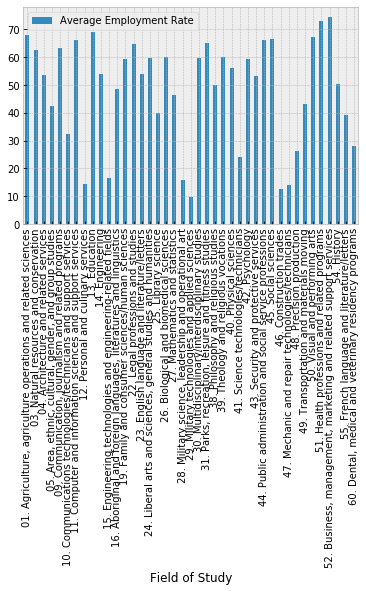

In [100]:
AvgEmplymentRate_field.plot(kind = 'bar')

It looks like that we have some disparities of the employment rate for the different fields of study. 

### What is the impact of the gender differences on the rate of employment/unemployment for Canadian graduates (regardless the geographical areas) ?

In [101]:
print("Average employment rate for women who have graduated from a collage or university is: %f" % Canada_data_final[Canada_data_final['DIM: Sex (3)']=='Female']['Dim: Labour force status (8): Member ID: [7]: Employment rate'].mean())
print("Average employment rate for men who have graduated from a collage or university is: %f" % Canada_data_final[Canada_data_final['DIM: Sex (3)']=='Male']['Dim: Labour force status (8): Member ID: [7]: Employment rate'].mean())

Average employment rate for women who have graduated from a collage or university is: 46.757835
Average employment rate for men who have graduated from a collage or university is: 50.244616


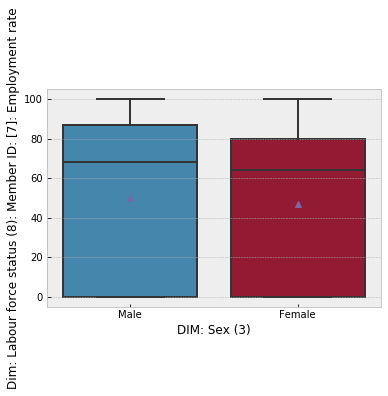

In [102]:
sns.boxplot(y=Canada_data_final['Dim: Labour force status (8): Member ID: [7]: Employment rate'], x= Canada_data_final['DIM: Sex (3)'],showmeans=True)


### Are the gender differences impact the formation of a field of study choice set?

In [103]:
DF2= Canada_data_final[['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','DIM: Sex (3)']]

In [104]:
DF2.columns= ['Field of Study','Sex']

In [105]:
DF2.pivot_table(index = ['Field of Study'],columns='Sex',aggfunc=np.count_nonzero).reset_index()

Sex,Field of Study,Female,Male
0,"01. Agriculture, agriculture operations and re...",800,800
1,03. Natural resources and conservation,800,800
2,04. Architecture and related services,800,800
3,"05. Area, ethnic, cultural, gender, and group ...",800,800
4,"09. Communication, journalism and related prog...",800,800
5,10. Communications technologies/technicians an...,800,800
6,11. Computer and information sciences and supp...,800,800
7,12. Personal and culinary services,800,800
8,13. Education,800,800
9,14. Engineering,800,800


So, it is clear that this data reflects equal opportunities of participation among men and women. That's can be explained that this data was collected to answer a question (e.g., impact of field of study on the labour force outcome) with uniform participation from both groups of the gender!

### Within major fields of study are there different employment rates for men/women?

In [106]:
Employment_Sex_field = pd.pivot_table(Canada_data_final,index=['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)'],values= 'Dim: Labour force status (8): Member ID: [7]: Employment rate',columns= 'DIM: Sex (3)', aggfunc=np.mean)

In [107]:
Employment_Sex_field

DIM: Sex (3),Female,Male
DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),,
"01. Agriculture, agriculture operations and related sciences",63.73175,71.93850
03. Natural resources and conservation,57.30300,67.49775
04. Architecture and related services,47.92900,58.95500
"05. Area, ethnic, cultural, gender, and group studies",47.19150,37.85900
"09. Communication, journalism and related programs",64.85850,61.50875
10. Communications technologies/technicians and support services,29.80850,35.07000
11. Computer and information sciences and support services,60.20925,72.31175
12. Personal and culinary services,13.41300,15.06900
13. Education,69.13525,68.92675


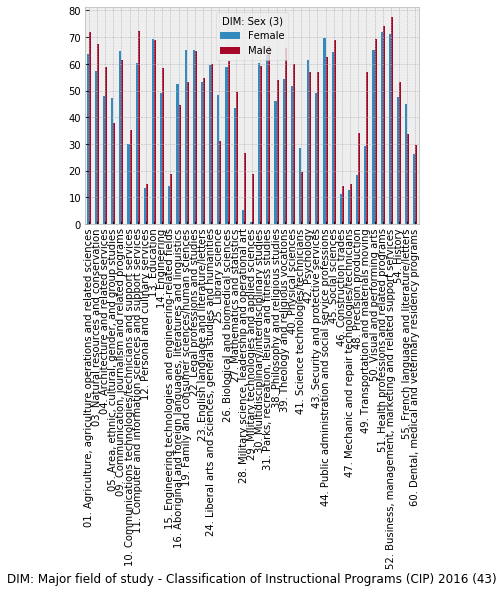

In [108]:
Employment_Sex_field.plot(kind = 'bar')

### How does the geographic location affect the employment rate for different fields of study

In [109]:
DF6 = Canada_data_final[['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','DIM: Sex (3)','GEO_NAME','Dim: Labour force status (8): Member ID: [7]: Employment rate']]

In [110]:
DF6.columns=['Field of Study','Sex','Province' ,'Average Employment Rate']

In [ ]:
Employment_Location_field.to_csv(path_or_buf= 'C:/Users/KBrig/Labour-Force-Outcome-Data-Analysis/LocationGender.csv',columns= Employment_Location_field.columns)


In [113]:
Employment_Location_field = pd.pivot_table(DF6,index=['Field of Study','Sex'],values= 'Average Employment Rate',columns= 'Province', aggfunc=np.mean)
Employment_Location_field

Province                                                   Alberta  \
Field of Study                                     Sex               
01. Agriculture, agriculture operations and rel... Female  71.2350   
                                                   Male    81.9300   
03. Natural resources and conservation             Female  70.5725   
                                                   Male    75.2300   
04. Architecture and related services              Female  68.8975   
                                                   Male    77.0975   
05. Area, ethnic, cultural, gender, and group s... Female  68.0825   
                                                   Male    55.9825   
09. Communication, journalism and related programs Female  71.8000   
                                                   Male    75.8100   
10. Communications technologies/technicians and... Female  35.3275   
                                                   Male    34.7050   
11. Computer and information sciences and suppo... Female  64.2675   
                                                   Male    75.3075   
12. Personal and culinary services                 Female  13.5350   
                                                   Male    15.5400   
13. Education                                      Female  71.2950   
                                                   Male    77.9225   
14. Engineering                                    Female  50.3875   
                                                   Male    58.4725   
15. Engineering technologies and engineering-re... Female  13.4425   
                                                   Male    14.8425   
16. Aboriginal and foreign languages, literatur... Female  59.2125   
                                                   Male    64.6500   
19. Family and consumer sciences/human sciences    Female  68.5050   
                                                   Male    73.8500   
22. Legal professions and studies                  Female  70.4700   
                                                   Male    79.0050   
23. English language and literature/letters        Female  60.6200   
                                                   Male    68.4100   
...                                                            ...   
41. Science technologies/technicians               Female  43.6975   
                                                   Male    17.7250   
42. Psychology                                     Female  71.0125   
                                                   Male    75.0075   
43. Security and protective services               Female  74.8575   
                                                   Male    74.2900   
44. Public administration and social service pr... Female  74.5300   
                                                   Male    77.9300   
45. Social sciences                                Female  67.5200   
                                                   Male    76.1200   
46. Construction trades                            Female  12.9275   
                                                   Male    15.3250   
47. Mechanic and repair technologies/technicians   Female  14.0000   
                                                   Male    15.5550   
48. Precision production                           Female  15.5500   
                                                   Male    51.6550   
49. Transportation and materials moving            Female  40.5950   
                                                   Male    77.8325   
50. Visual and performing arts                     Female  69.9300   
                                                   Male    77.3725   
51. Health professions and related programs        Female  73.7050   
                                                   Male    78.2150   
52. Business, management, marketing and related... Female  71.3825   
                                                   Male    78.8375   
54. Histor

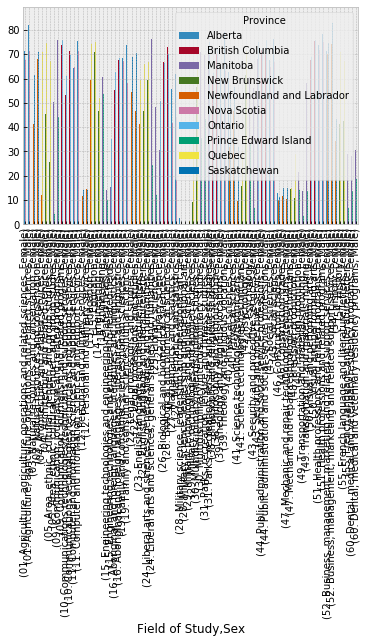

In [116]:
Employment_Location_field.plot(kind='bar')

In [ ]:
Employment_Location_field.to_csv(path_or_buf= 'C:/Users/KBrig/Labour-Force-Outcome-Data-Analysis/LocationGender.csv',columns= Employment_Location_field.columns)

In [137]:
Employment_Location_field['Alberta']['Sex'=='Female']

71.23500000000001

### How about the age, does it affect the employment rate for different fields of study? 

In [138]:
DF5= Canada_data_final[['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','DIM: Sex (3)','DIM: Age (9)','Dim: Labour force status (8): Member ID: [7]: Employment rate']]

In [139]:
DF5.columns=['Field of Study','Sex','Age' ,'Average Employment Rate']

In [140]:
Employment_Age_field = pd.pivot_table(DF5,index=['Field of Study','Sex'],values= 'Average Employment Rate',columns= 'Age', aggfunc=np.mean)
Employment_Age_field

Age                                                        15 to 24 years  \
Field of Study                                     Sex                      
01. Agriculture, agriculture operations and rel... Female          56.228   
                                                   Male            47.052   
03. Natural resources and conservation             Female          46.472   
                                                   Male            40.564   
04. Architecture and related services              Female          32.254   
                                                   Male            33.528   
05. Area, ethnic, cultural, gender, and group s... Female          30.808   
                                                   Male            10.106   
09. Communication, journalism and related programs Female          58.744   
                                                   Male            44.634   
10. Communications technologies/technicians and... Female          25.068   
                                                   Male            26.346   
11. Computer and information sciences and suppo... Female          43.102   
                                                   Male            57.798   
12. Personal and culinary services                 Female          15.238   
                                                   Male            15.342   
13. Education                                      Female          67.842   
                                                   Male            48.490   
14. Engineering                                    Female          38.666   
                                                   Male            47.642   
15. Engineering technologies and engineering-re... Female          15.620   
                                                   Male            16.450   
16. Aboriginal and foreign languages, literatur... Female          38.392   
                                                   Male            21.580   
19. Family and consumer sciences/human sciences    Female          55.084   
                                                   Male            32.184   
22. Legal professions and studies                  Female          45.868   
                                                   Male            32.788   
23. English language and literature/letters        Female          41.894   
                                                   Male            31.104   
...                                                                   ...   
41. Science technologies/technicians               Female           9.808   
                                                   Male             5.538   
42. Psychology                                     Female          51.972   
                                                   Male            36.752   
43. Security and protective services               Female          47.688   
                                                   Male            47.234   
44. Public administration and social service pr... Female          63.052   
                                                   Male            36.484   
45. Social sciences                                Female          58.130   
                                                   Male            48.392   
46. Construction trades                            Female          12.518   
                                                   Male            14.790   
47. Mechanic and repair technologies/technicians   Female          13.628   
                                                   Male            15.832   
48. Precision production                           Female          13.826   
                                                   Male            16.642   
49. Transportation and materials moving            Female          18.260   
                                                   Male            38.936   
50. Visual and performing arts                     Female          62.474

In [141]:
Employment_Age_field.to_csv(path_or_buf= 'C:/Users/KBrig/Labour-Force-Outcome-Data-Analysis/AgeGender.csv',columns= Employment_Age_field.columns)

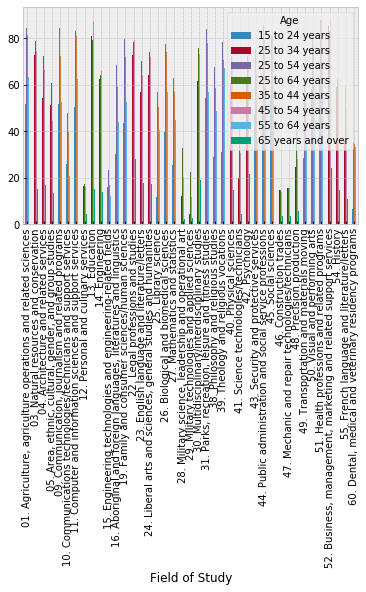

In [120]:
Employment_Age_field.plot(kind='bar')

### Combining all the previous factors together!

In [121]:
DF_tot = Canada_data_final[['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','DIM: Age (9)','DIM: Sex (3)','GEO_NAME','Dim: Labour force status (8): Member ID: [7]: Employment rate']]
DF_tot.columns=['Field of Study','Age','Gender','Province' ,'Average Employment Rate']
TotAgg= pd.pivot_table(DF_tot,index=['Field of Study','Gender','Age'],values= 'Average Employment Rate',columns= 'Province', aggfunc=np.mean)
TotAgg

Province                                                                     Alberta  \
Field of Study                                     Gender Age                          
01. Agriculture, agriculture operations and rel... Female 15 to 24 years       56.04   
                                                          25 to 34 years       82.20   
                                                          25 to 54 years       83.02   
                                                          25 to 64 years       81.02   
                                                          35 to 44 years       83.66   
                                                          45 to 54 years       83.36   
                                                          55 to 64 years       71.34   
                                                          65 years and over    29.24   
                                                   Male   15 to 24 years       70.86   
                                                          25 to 34 years       90.88   
                                                          25 to 54 years       92.62   
                                                          25 to 64 years       89.30   
                                                          35 to 44 years       92.96   
                                                          45 to 54 years       93.14   
                                                          55 to 64 years       82.18   
                                                          65 years and over    43.50   
03. Natural resources and conservation             Female 15 to 24 years       70.50   
                                                          25 to 34 years       81.92   
                                                          25 to 54 years       81.20   
                                                          25 to 64 years       79.44   
                                                          35 to 44 years       78.64   
                                                          45 to 54 years       85.04   
                                                          55 to 64 years       61.16   
                                                          65 years and over    26.68   
                                                   Male   15 to 24 years       63.16   
                                                          25 to 34 years       86.76   
                                                          25 to 54 years       87.56   
                                                          25 to 64 years       84.14   
                                                          35 to 44 years       89.28   
                                                          45 to 54 years       85.78   
...                                                                              ...   
55. French language and literature/letters         Female 25 to 54 years       71.76   
                                                          25 to 64 years       72.96   
                                                          35 to 44 years       51.22   
                                                          45 to 54 years       60.64   
                                                          55 to 64 years       46.30   
                                                          65 years and over    11.48   
                                                   Male   15 to 24 years        0.00   
                                                          25 to 34 years       33.34   
                                                          25 to 54 years       92.72   
                                                          25 to 64 years       87.72   
                                                          35 to 44 years       50.84   
                                                          45 to 54 years       60.00   
                                        

In [143]:
TotAgg.to_csv(path_or_buf= 'C:/Users/KBrig/Labour-Force-Outcome-Data-Analysis/TotalAgg.csv',columns=TotAgg.columns)